In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
import glob
import astroalign as aa
from astropy.io import fits
from matplotlib.colors import LogNorm
from ccdproc import cosmicray_lacosmic as lacosmic

For more information about combining images with the FITS library see here: https://learn.astropy.org/FITS-images.html 

For more information about image alignment see the astro-align pages here: 
https://astroalign.readthedocs.io/en/latest/tutorial.html

This demo script aligns four images, stacks them, and outputs the stacked file. 

You need also the CCDproc library to clear the imags of cosmic rays. 


In [35]:
data_directory = 'imgs/science/calibrated/'
output_dir = 'imgs/science/calibrated/aligned/'


In [135]:
image_list = glob.glob(data_directory+'calibrated-T30-fetedelascience-NGC7293-2020111*-*-SII-BIN1-W-*.fit')
# do with Ha first 

In [136]:
image_list

['imgs/science/calibrated\\calibrated-T30-fetedelascience-NGC7293-20201119-221935-SII-BIN1-W-600-001.fit']

Open the first extension of the first image  in the list with fitsio and use lacosmic to remove cosmic rays. 


In [137]:
target=(fits.open(image_list[0])[0]).data
target, mask = lacosmic(target)

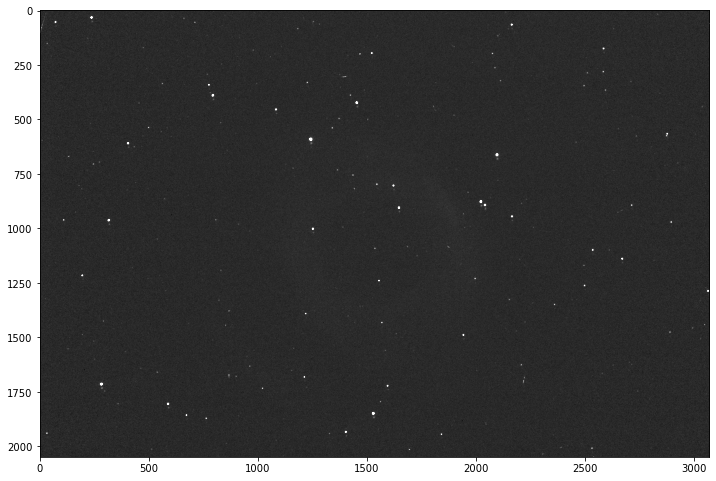

In [138]:
disp_img = target
v_med = np.mean(disp_img)
v_std = np.std(disp_img)
plt.figure(figsize=(12,12))
plt.imshow(target, cmap='gray',vmin=v_med-v_std,vmax=v_med+5*v_std)

In [139]:
image_concat = [target]
for image in image_list[1:]:
    source = fits.open(image)[0].data
    source, mask = lacosmic(source)
    registered_image, footprint = aa.register(source,target)
    image_concat.append(registered_image)

Go through the list of files, register them, and add them together. 

In [140]:
final_image = np.median(image_concat, axis=0)

Make a median of all the  images. 

0.0 119.15421 27187.283


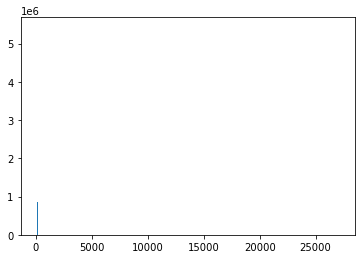

In [141]:
print(np.min(final_image),np.mean(final_image),np.max(final_image))
_=plt.hist(final_image.flatten(),bins=400)


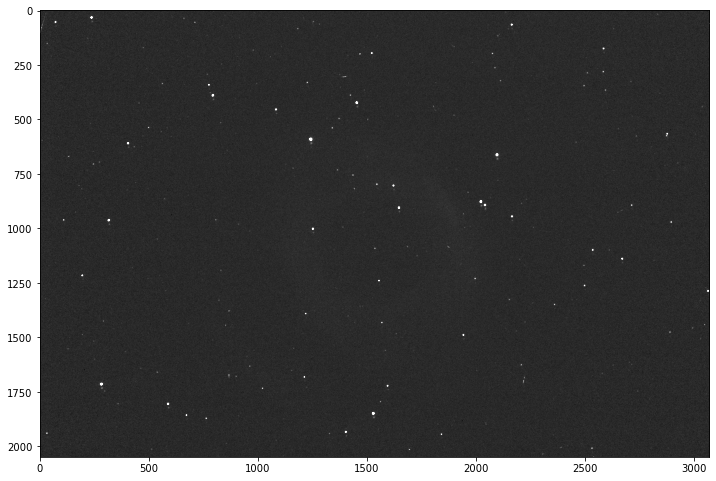

In [142]:
disp_img = final_image
v_med = np.mean(disp_img)
v_std = np.std(disp_img)
plt.figure(figsize=(12,12))
plt.imshow(target, cmap='gray',vmin=v_med-v_std,vmax=v_med+5*v_std)

In [99]:
outfile = os.path.join(output_dir,'B_final_image.fits')
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)
